<a href="https://colab.research.google.com/github/niruthikka24/Intro-to-ML-Labs/blob/main/Lab%203/PCA_Lab_for_Intro_to_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np

from scipy import stats
from sklearn.preprocessing import StandardScaler

from numpy.linalg import svd
from sklearn.decomposition import PCA

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('https://firebasestorage.googleapis.com/v0/b/data-spark-storage.appspot.com/o/datasets%2Firis_test.csv?alt=media&token=32c9a339-915a-46e4-99f5-a00c4e56cd9b')
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
up1 = files.upload()

Saving iris.data to iris.data


In [ ]:
data = pd.read_csv("iris.data", header=None)
data.columns = ["sepal length", "sepal width", "petal length", "petal width","class"]
data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
cols = data.select_dtypes([np.number]).columns
print (cols[0])

sepal length


In [ ]:
data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.to_csv('iris.csv', index=False)
files.download('iris.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
newdf = pd.read_csv('iris.csv')
newdf.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df_list = data.head().values.tolist()
df_list

[[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
 [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
 [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
 [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
 [5.0, 3.6, 1.4, 0.2, 'Iris-setosa']]

In [ ]:
# Create an empty list
Row_list =[]
i = 0
# Iterate over each row
for index, rows in data.iterrows():
    if (i == 5):
      break
    # Create list for the current row
    my_list =[rows.Date, rows.Event, rows.Cost]

    # append the list to the final list
    Row_list.append(my_list)
    i += 1

# Print the list
print(Row_list)

In [ ]:
collis = list(data.select_dtypes([np.number]).columns)
print(collis)

['sepal length', 'sepal width', 'petal length', 'petal width']


In [ ]:
for col in collis:
  print(np.quantile(data[col],0.5).round(2))

5.8
3.0
4.35
1.3


In [ ]:
meanlis = data.mean(numeric_only=True)
for i in range(len(cols)):
  print(cols[i],meanlis[i])

sepal length 5.843333333333335
sepal width 3.0540000000000007
petal length 3.7586666666666693
petal width 1.1986666666666672


In [ ]:
data.shape

(150, 5)

In [ ]:
data.isna().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [ ]:
dfsetosa = data[data['class'] == 'Iris-setosa']
dfsetosa.shape

(50, 5)

In [ ]:
dfversi = data[data['class'] == 'Iris-versicolor']
dfversi.shape

(50, 5)

In [ ]:
dfvirginica = data[data['class'] == 'Iris-virginica']
dfvirginica.shape

NameError: ignored

In [ ]:
data.head()
df = data.loc[:,['sepal length','sepal width','petal length','petal width']]
df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
for col in df.columns:
  df[col] = (df[col] - df[col].mean()) / df[col].std()

df.head()

,sepal length,sepal width,petal length,petal width
0,-0.897674,1.028611,-1.336794,-1.308593
1,-1.139200,-0.124540,-1.336794,-1.308593
2,-1.380727,0.336720,-1.393470,-1.308593
3,-1.501490,0.106090,-1.280118,-1.308593
4,-1.018437,1.259242,-1.336794,-1.308593


In [ ]:
data['sl'] = (data['sepal length'] - data['sepal length'].mean()) / data['sepal length'].std()
data['sw'] = (data['sepal width'] - data['sepal width'].mean()) / data['sepal width'].std()
data['pl'] = (data['petal length'] - data['petal length'].mean()) / data['petal length'].std()
data['pw'] = (data['petal width'] - data['petal width'].mean()) / data['petal width'].std()
data.head()

,sepal length,sepal width,petal length,petal width,class,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2,Iris-setosa,-0.897674,1.028611,-1.336794,-1.308593
1,4.9,3.0,1.4,0.2,Iris-setosa,-1.139200,-0.124540,-1.336794,-1.308593
2,4.7,3.2,1.3,0.2,Iris-setosa,-1.380727,0.336720,-1.393470,-1.308593
3,4.6,3.1,1.5,0.2,Iris-setosa,-1.501490,0.106090,-1.280118,-1.308593
4,5.0,3.6,1.4,0.2,Iris-setosa,-1.018437,1.259242,-1.336794,-1.308593


In [ ]:
data['sl1'] = stats.zscore(data['sepal length'])
data['sw1'] = stats.zscore(data['sepal width'])
data['pl1'] = stats.zscore(data['petal length'])
data['pw1'] = stats.zscore(data['petal width'])
print(data['sl1'].var())
print(data['sl1'].mean())

1.006711409395973
-2.7755575615628914e-16


In [ ]:
print(data['sl'].var())
print(data['sl'].mean())

1.000000000000001
-1.457167719820518e-15


In [ ]:
# scaler = StandardScaler()
df1 = data.loc[:,['sepal length','sepal width','petal length','petal width']]
# df1.head()
# transform data
# df = scaler.fit_transform(df)
scaler = StandardScaler()
# transform data
stdscaled = df1.copy(deep=True)
stdscaled[stdscaled.columns] = scaler.fit_transform(stdscaled[stdscaled.columns])
# stdscaled = scaler.fit_transform(x)
stdscaled.head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [ ]:
print(stdscaled['sepal length'].var())
print(stdscaled['sepal length'].mean())

1.006711409395973
-2.7755575615628914e-16


In [ ]:
normmeanlis = []
normvarlis = []
stdsclmeanlis = []
stdsclvarlis = []
zscoremeanlis = []
zscorevarlis = []
cols = ['sepal length','sepal width','petal length','petal width']
cols1 = ['sl','sw','pl','pw']
cols2 = ['sl1','sw1','pl1','pw1']
for i in range(4):
  normmeanlis.append(data[cols1[i]].mean())
  normvarlis.append(data[cols1[i]].var())
  stdsclmeanlis.append(stdscaled[cols[i]].mean())
  stdsclvarlis.append(stdscaled[cols[i]].var())
  zscoremeanlis.append(data[cols2[i]].mean())
  zscorevarlis.append(data[cols2[i]].var())

compdf = pd.DataFrame(list(zip(normmeanlis, stdsclmeanlis, zscoremeanlis, normvarlis, stdsclvarlis, zscorevarlis)),
               columns =['Normal Mean', 'Std Scl Mean', 'Zscore Mean', 'Normal Variance', 'Std Scl Variance', 'Zscore Variance'])
meandf = pd.DataFrame(list(zip(normmeanlis, stdsclmeanlis, zscoremeanlis)),
               columns =['Method 1', 'Method 2', 'Method 3'])
meandf.insert(0, '', ['Sepal Length Mean','Sepal Width Mean','Petal Length Mean','Petal Width Mean'])
vardf = pd.DataFrame(list(zip(normvarlis, stdsclvarlis, zscorevarlis)),
               columns =['Method 1', 'Method 2', 'Method 3'])
vardf.insert(0, '', ['Sepal Length Variance','Sepal Width Variance','Petal Length Variance','Petal Width Variance'])
meandf

,,Method 1,Method 2,Method 3
0,Sepal Length Mean,-1.457168e-15,-2.775558e-16,-2.775558e-16
1,Sepal Width Mean,-1.722511e-15,-5.140333e-16,-5.140333e-16
2,Petal Length Mean,-2.043551e-15,1.154632e-16,1.154632e-16
3,Petal Width Mean,-9.843977e-17,9.251859e-16,9.251859e-16


In [ ]:
vardf

,,Method 1,Method 2,Method 3
0,Sepal Length Variance,1.0,1.006711,1.006711
1,Sepal Width Variance,1.0,1.006711,1.006711
2,Petal Length Variance,1.0,1.006711,1.006711
3,Petal Width Variance,1.0,1.006711,1.006711


In [ ]:
data.head()

,sepal length,sepal width,petal length,petal width,class,sl,sw,pl,pw,sl1,sw1,pl1,pw1
0,5.1,3.5,1.4,0.2,Iris-setosa,-0.897674,1.028611,-1.336794,-1.308593,-0.900681,1.032057,-1.341272,-1.312977
1,4.9,3.0,1.4,0.2,Iris-setosa,-1.139200,-0.124540,-1.336794,-1.308593,-1.143017,-0.124958,-1.341272,-1.312977
2,4.7,3.2,1.3,0.2,Iris-setosa,-1.380727,0.336720,-1.393470,-1.308593,-1.385353,0.337848,-1.398138,-1.312977
3,4.6,3.1,1.5,0.2,Iris-setosa,-1.501490,0.106090,-1.280118,-1.308593,-1.506521,0.106445,-1.284407,-1.312977
4,5.0,3.6,1.4,0.2,Iris-setosa,-1.018437,1.259242,-1.336794,-1.308593,-1.021849,1.263460,-1.341272,-1.312977


In [ ]:
#decided to stick to the normal way of standardizing the columns
stddf = data.loc[:,['sl','sw','pl','pw']]
stddf.columns = ['sepal length', 'sepal width', 'petal length', 'petal width']


covmatrix = stddf.cov()
covmatrix

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


In [ ]:
print('U: - \n')
print(U)
print("\nS: -\n")
print(S)
print("\nV: -\n")
print(V)



U, S, V = svd(covmatrix)

U: - 

[[-0.52237162 -0.37231836  0.72101681  0.26199559]
 [ 0.26335492 -0.92555649 -0.24203288 -0.12413481]
 [-0.58125401 -0.02109478 -0.14089226 -0.80115427]
 [-0.56561105 -0.06541577 -0.6338014   0.52354627]]

S: -

[2.91081808 0.92122093 0.14735328 0.02060771]

V: -

[[-0.52237162  0.26335492 -0.58125401 -0.56561105]
 [-0.37231836 -0.92555649 -0.02109478 -0.06541577]
 [ 0.72101681 -0.24203288 -0.14089226 -0.6338014 ]
 [ 0.26199559 -0.12413481 -0.80115427  0.52354627]]


In [ ]:
pca2 = U[:4,:2]
pca2

array([[-0.52237162, -0.37231836],
       [ 0.26335492, -0.92555649],
       [-0.58125401, -0.02109478],
       [-0.56561105, -0.06541577]])

In [ ]:
feature_vector = pca2

In [ ]:
reduced = feature_vector.transpose().dot(stddf.transpose())                               #pca2
reduceddf = pd.DataFrame(reduced.transpose())
reduceddf.columns = ['PCA1','PCA2']
reduceddf.head()

,PCA1,PCA2
0,2.256981,-0.504015
1,2.079459,0.653216
2,2.360044,0.317414
3,2.296504,0.573447
4,2.380802,-0.672514


In [ ]:
print(reduceddf.shape)

(150, 2)


In [ ]:
reduceddf['class'] = data['class']
print(reduceddf.shape)
reduceddf.head()

(150, 3)


,PCA1,PCA2,class
0,2.256981,-0.504015,Iris-setosa
1,2.079459,0.653216,Iris-setosa
2,2.360044,0.317414,Iris-setosa
3,2.296504,0.573447,Iris-setosa
4,2.380802,-0.672514,Iris-setosa


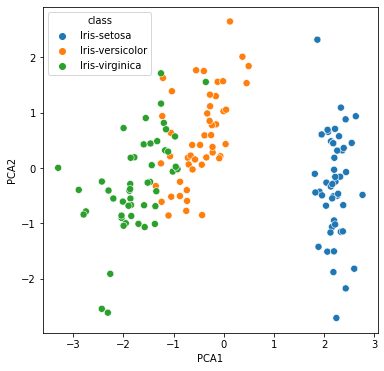

In [ ]:
plt.figure(figsize = (6,6))
# plt.title("Computed PC values")
sns.scatterplot(data = reduceddf , x = 'PCA1',y = 'PCA2' , hue = 'class',s=50)

In [ ]:
stddf.head()

,sepal length,sepal width,petal length,petal width
0,-0.897674,1.028611,-1.336794,-1.308593
1,-1.139200,-0.124540,-1.336794,-1.308593
2,-1.380727,0.336720,-1.393470,-1.308593
3,-1.501490,0.106090,-1.280118,-1.308593
4,-1.018437,1.259242,-1.336794,-1.308593


In [ ]:
pca_2 = PCA(n_components=2,random_state=3)
pca_2.fit(stddf)
reduceddf2 = pca_2.transform(stddf)
reduceddf2 = pd.DataFrame(reduceddf2)
reduceddf2.columns = ['PCA1','PCA2']
reduceddf2.head()

,PCA1,PCA2
0,-2.256981,0.504015
1,-2.079459,-0.653216
2,-2.360044,-0.317414
3,-2.296504,-0.573447
4,-2.380802,0.672514


In [ ]:
reduceddf2['class'] = data['class']
reduceddf2.head()

,PCA1,PCA2,class
0,-2.256981,0.504015,Iris-setosa
1,-2.079459,-0.653216,Iris-setosa
2,-2.360044,-0.317414,Iris-setosa
3,-2.296504,-0.573447,Iris-setosa
4,-2.380802,0.672514,Iris-setosa


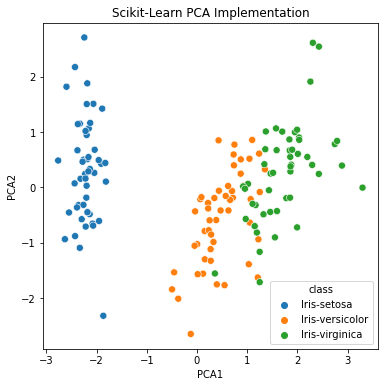

In [ ]:
plt.figure(figsize = (6,6))
plt.title("Scikit-Learn PCA Implementation")
sns.scatterplot(data = reduceddf2, x = 'PCA1',y = 'PCA2' , hue = 'class' , s = 50 )

In [ ]:
pca_2.get_covariance()

array([[ 0.97140471, -0.10037114,  0.86489005,  0.85560646],
       [-0.10037114,  0.99726417, -0.41637465, -0.37038414],
       [ 0.86489005, -0.41637465,  1.03941772,  0.93051689],
       [ 0.85560646, -0.37038414,  0.93051689,  0.99191341]])

In [ ]:
explained_variance=pca_2.explained_variance_ratio_
explained_variance

array([0.72770452, 0.23030523])

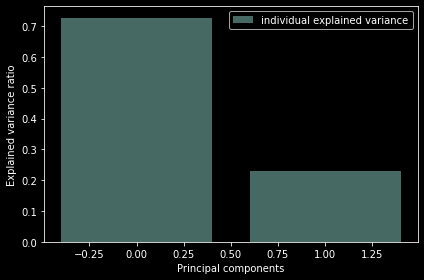

In [ ]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(2), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [ ]:
!pip install pca

from pca import pca

# Initialize to reduce the data up to the number of componentes that explains 95% of the variance.
# model = pca(n_components=0.95)

# Or reduce the data towards 2 PCs
model = pca(n_components=2)

# Fit transform
results = model.fit_transform(stddf)

# Plot explained variance
fig, ax = model.plot()

# Scatter first 2 PCs
fig, ax = model.scatter()

# Make biplot with the number of features
fig, ax = model.biplot(n_feat=4)

In [ ]:
up2 = files.upload()

Saving iris.names to iris.names
Saving bezdekIris.data to bezdekIris.data


In [ ]:
data1 = pd.read_csv("bezdekIris.data", header=None)
data1.columns = ["sepal length", "sepal width", "petal length", "petal width","class"]
data1.head()

# names = pd.read_csv('bezdekIris.data')
# names.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data1.isna().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64